<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week8/Day6/DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Challenge: Analyzing the IMDB Movie Dataset with Matplotlib and Seaborn**

Instructions

1. Your task is to explore the IMDB Movie Dataset, which includes columns like Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Meta_score, Director, Stars, No_of_votes, and Gross.
* Use pandas to load the IMDB Movie Dataset.
* Inspect the data to understand its structure and contents.
2. Data Preprocessing:
* Handle missing values and convert data types as needed.

3. Rating Trends Over Years:
* Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.
4. Genre Popularity Analysis:
* Generate a Seaborn bar plot to compare the number of movies across different genres.
5. Director's Impact on Ratings:
* Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.
6. Star Power Analysis:
* Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.
7. Box Plot of Genres vs. Ratings:
* Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.
8. Correlation Heatmap:
* Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.


(1000, 16)
Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

               

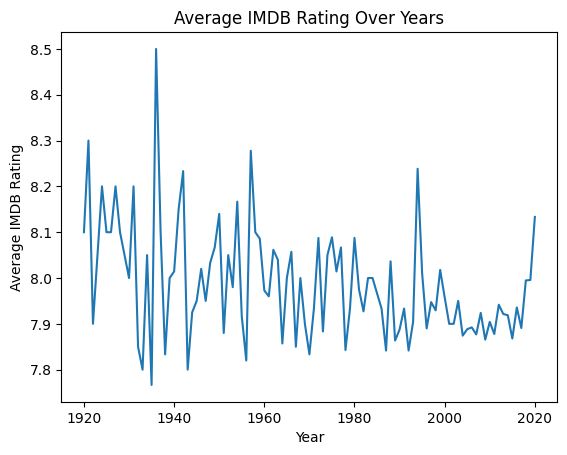

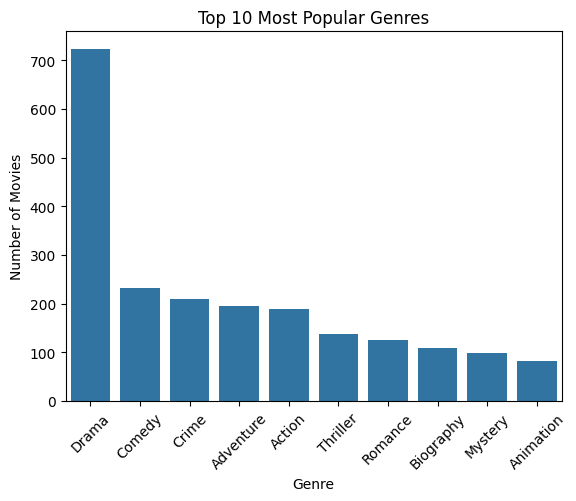

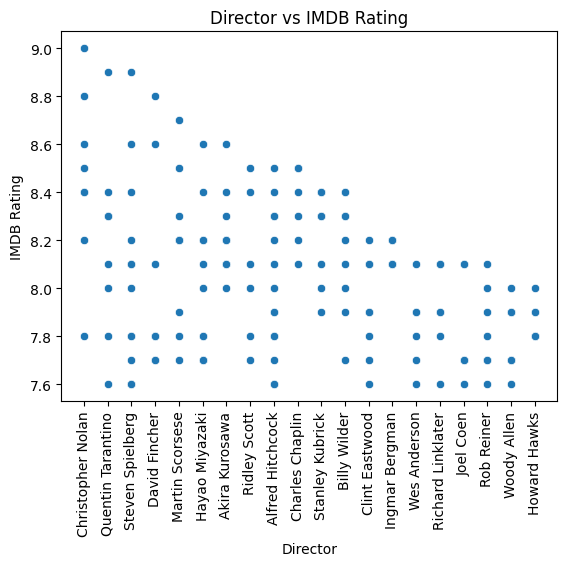

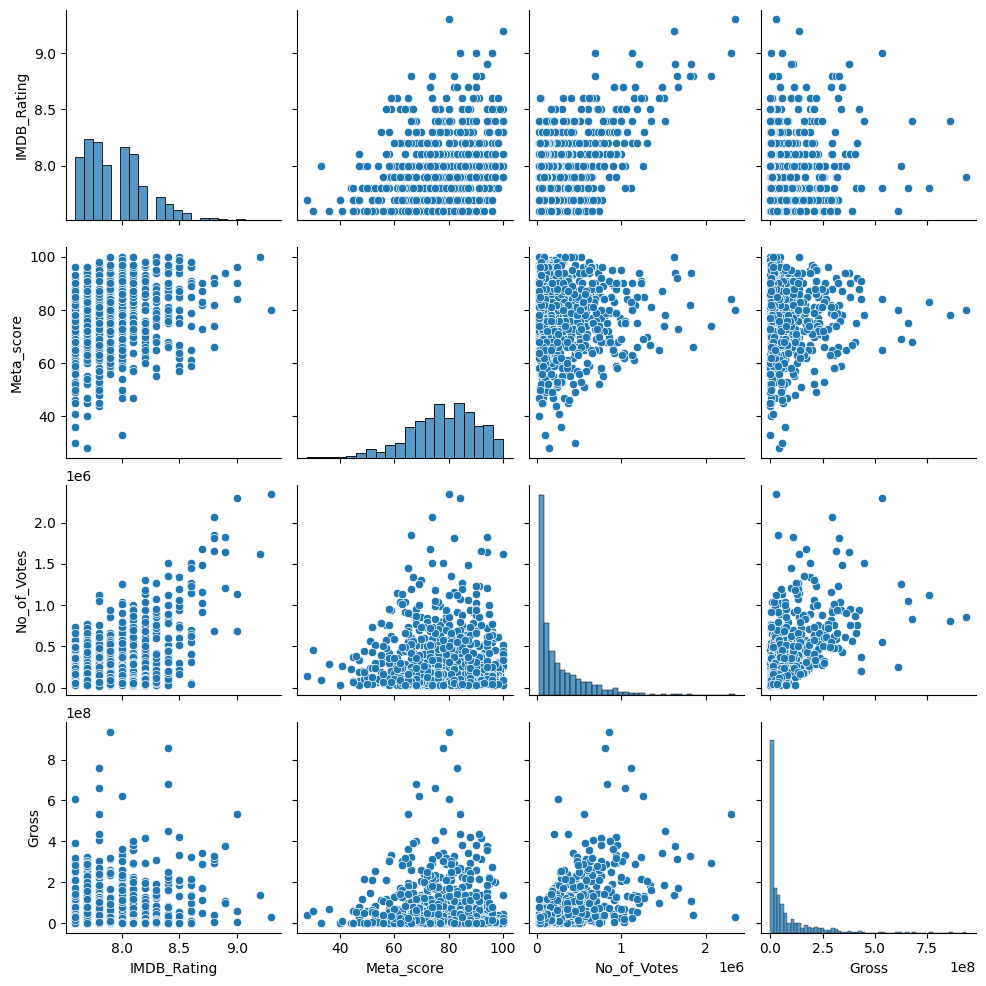

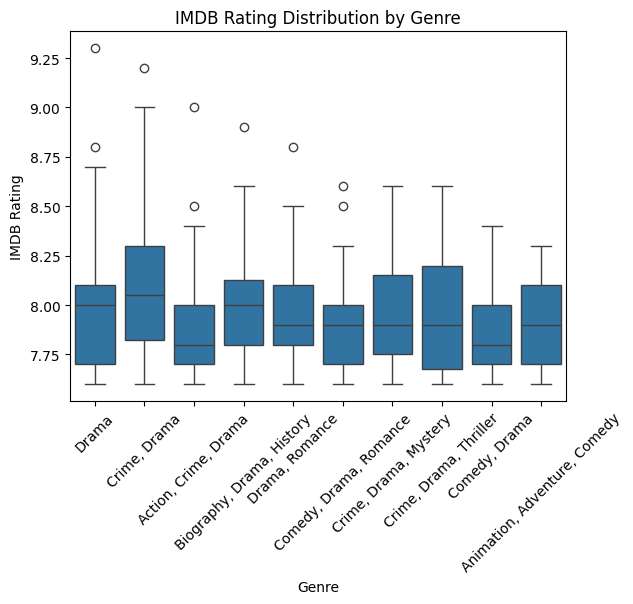

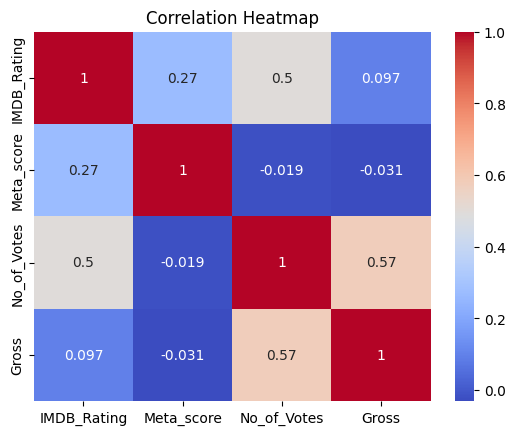

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploring the IMDB Movie Dataset

df = pd.read_csv("imdb_top_1000.csv")

print(df.shape)
print(df.columns)
print(df.head())

# 2. Data Preprocessing

# Convert Released_Year to numeric
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

# Convert Meta_score to numeric
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")

# Remove commas from Gross and convert to numeric
df["Gross"] = df["Gross"].astype(str).str.replace(",", "")
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

# Drop rows with missing important values
df = df.dropna(subset=["Released_Year", "IMDB_Rating", "Genre"])

# 3. Rating Trends Over Years

# Group by year and calculate average rating
rating_by_year = df.groupby("Released_Year")["IMDB_Rating"].mean()

# Line plot
plt.figure()
plt.plot(rating_by_year.index, rating_by_year.values)
plt.title("Average IMDB Rating Over Years")
plt.xlabel("Year")
plt.ylabel("Average IMDB Rating")
plt.show()

# 4. Genre Popularity Analysis

genre_counts = df["Genre"].str.split(", ").explode().value_counts().head(10)

plt.figure()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Top 10 Most Popular Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

# 5. Director’s Impact on Ratings

top_directors = df["Director"].value_counts().head(20).index
df_top_directors = df[df["Director"].isin(top_directors)]

plt.figure()
sns.scatterplot(x="Director", y="IMDB_Rating", data=df_top_directors)
plt.title("Director vs IMDB Rating")
plt.xlabel("Director")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=90)
plt.show()

# 6. Star Power Analysis

# Select numerical columns
pairplot_data = df[["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]]

# Pairplot
sns.pairplot(pairplot_data)
plt.show()

# 7. Box Plot of Genres vs Ratings

# Use top 10 genres
top_genres = df["Genre"].value_counts().head(10).index
df_top_genres = df[df["Genre"].isin(top_genres)]

# Box plot
plt.figure()
sns.boxplot(x="Genre", y="IMDB_Rating", data=df_top_genres)
plt.title("IMDB Rating Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=45)
plt.show()

# 8. Correlation Heatmap

# Select numeric columns
numeric_cols = df[["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]]

# Correlation matrix
corr = numeric_cols.corr()

# Heatmap
plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Line Plot** - Rating Trends Over Years
This line plot shows how the average IMDB rating changes over time.
It helps identify trends and see if movie ratings improve or decline across years.

**Bar Plot** - Genre Popularity
This bar chart shows how many movies belong to each genre.
It helps compare genres and see which ones are the most popular.

**Scatter Plot** - Director vs Rating
This scatter plot shows the relationship between directors and their movie ratings.
It helps understand if certain directors tend to have higher-rated movies.

**Pairplot** - Star Power Analysis
This pairplot shows relationships between rating, votes, meta score, and gross revenue.
It helps identify patterns, correlations, and trends between numerical variables.

**Box Plot** - Genre vs Rating
This box plot shows how IMDB ratings are distributed across different genres.
It helps compare median ratings, variation, and outliers between genres.

**Heatmap** - Correlation Between Variables
This heatmap shows correlations between rating, meta score, votes, and gross.
It helps identify strong relationships between numerical features.